开始聚合分析 (剔除节假日+春节前后+国庆前)...
正在生成剔除日期明细报告...
  -> 共识别出 168 个需要剔除的日期。
正在处理: 四大高耗能 (包含 4 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 四大高耗能


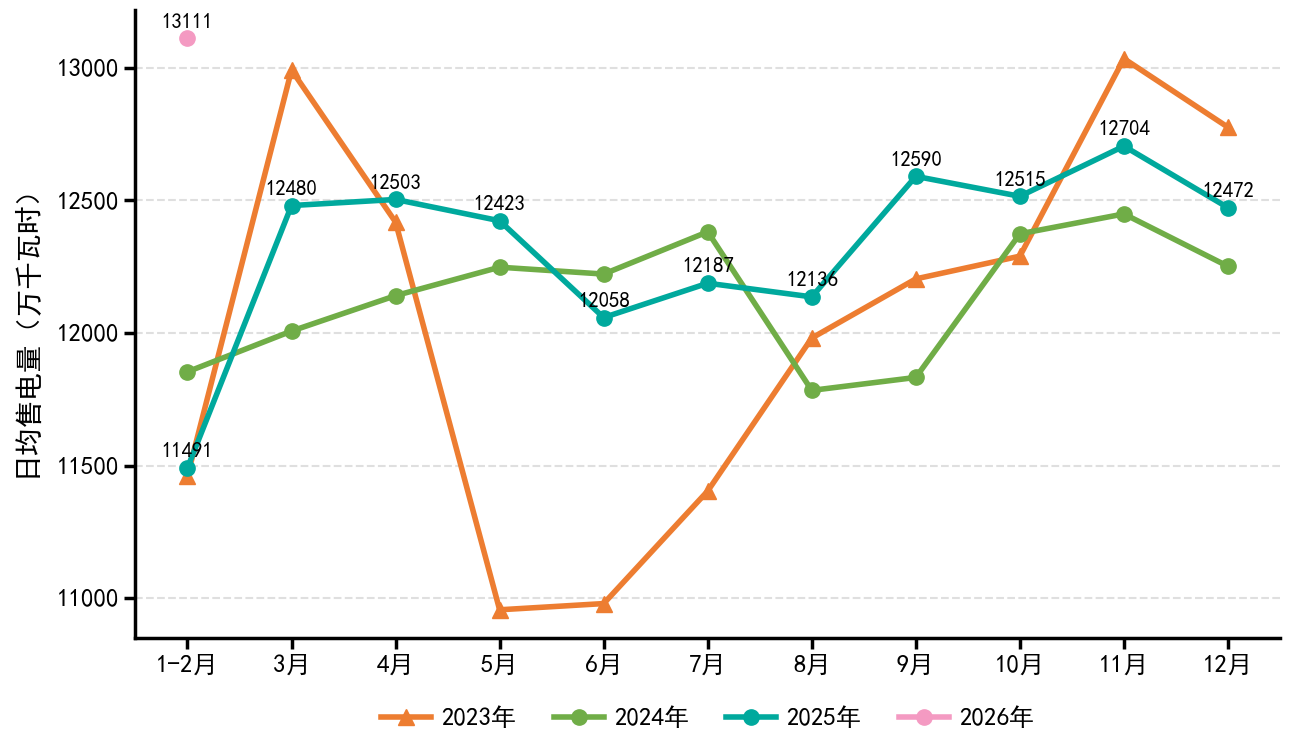

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\四大高耗能.png
------------------------------
正在处理: 高技术与装备制造 (包含 9 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 高技术与装备制造


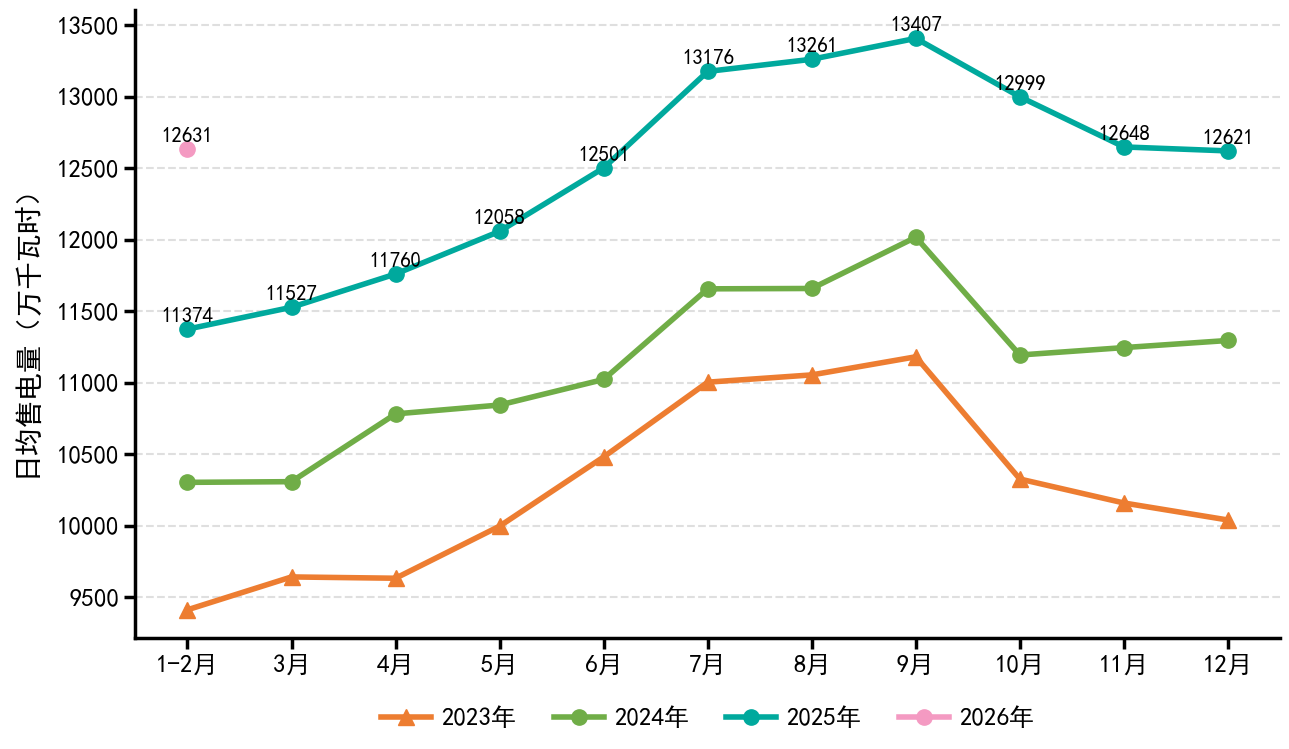

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\高技术与装备制造.png
------------------------------
正在处理: 消费品制造业 (包含 12 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 消费品制造业


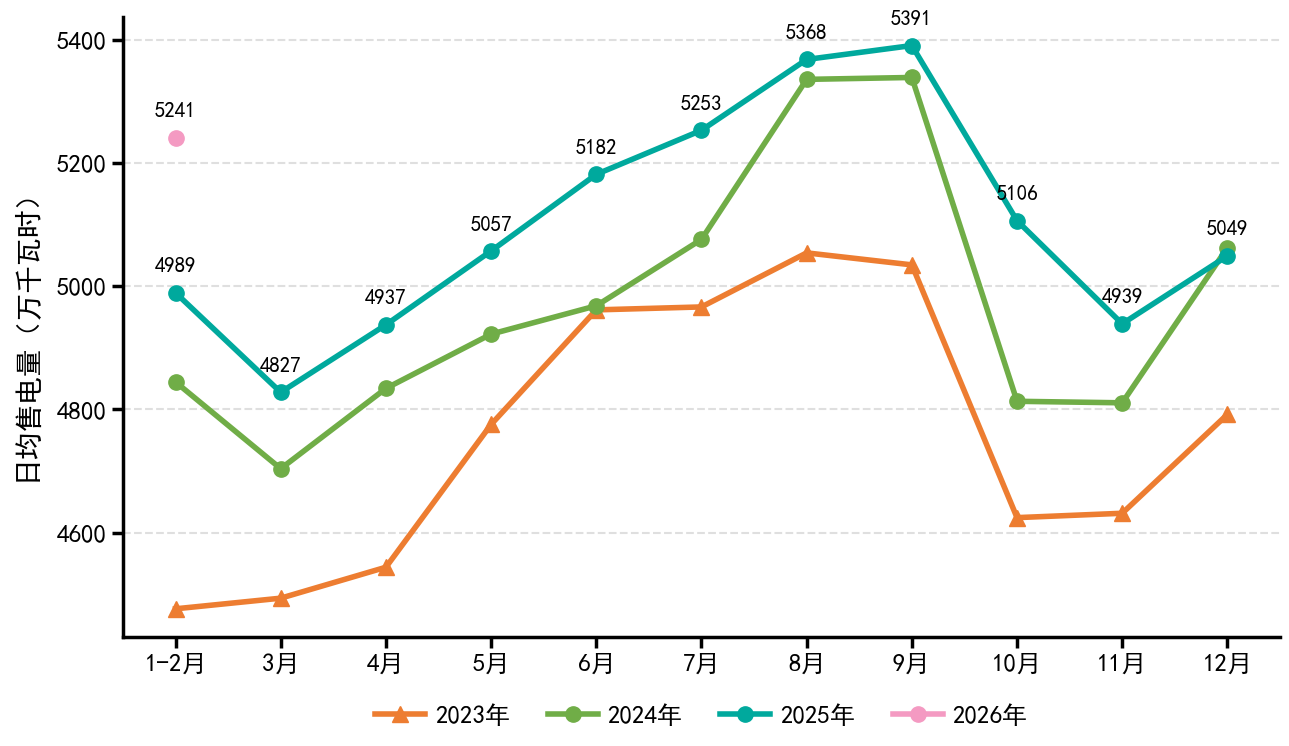

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\消费品制造业.png
------------------------------
正在处理: 二产 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 二产


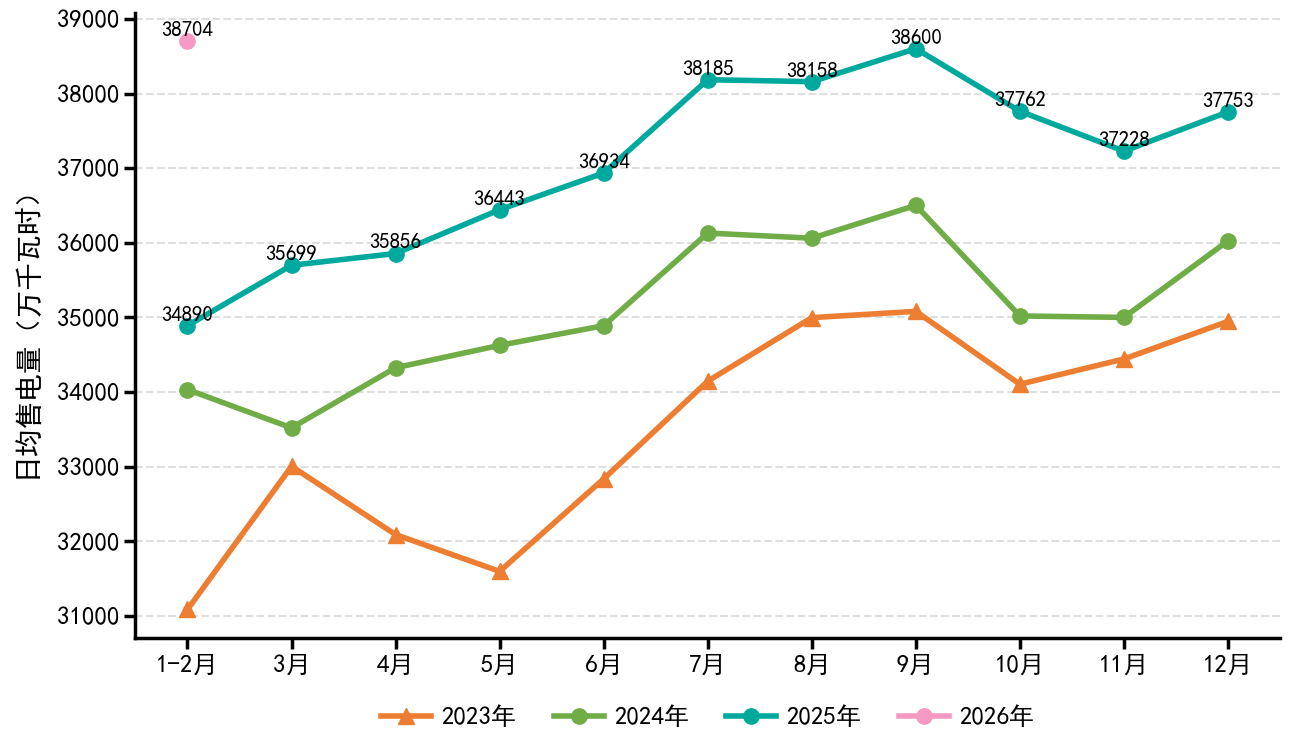

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\二产.png
------------------------------
正在处理: 化工 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 化工


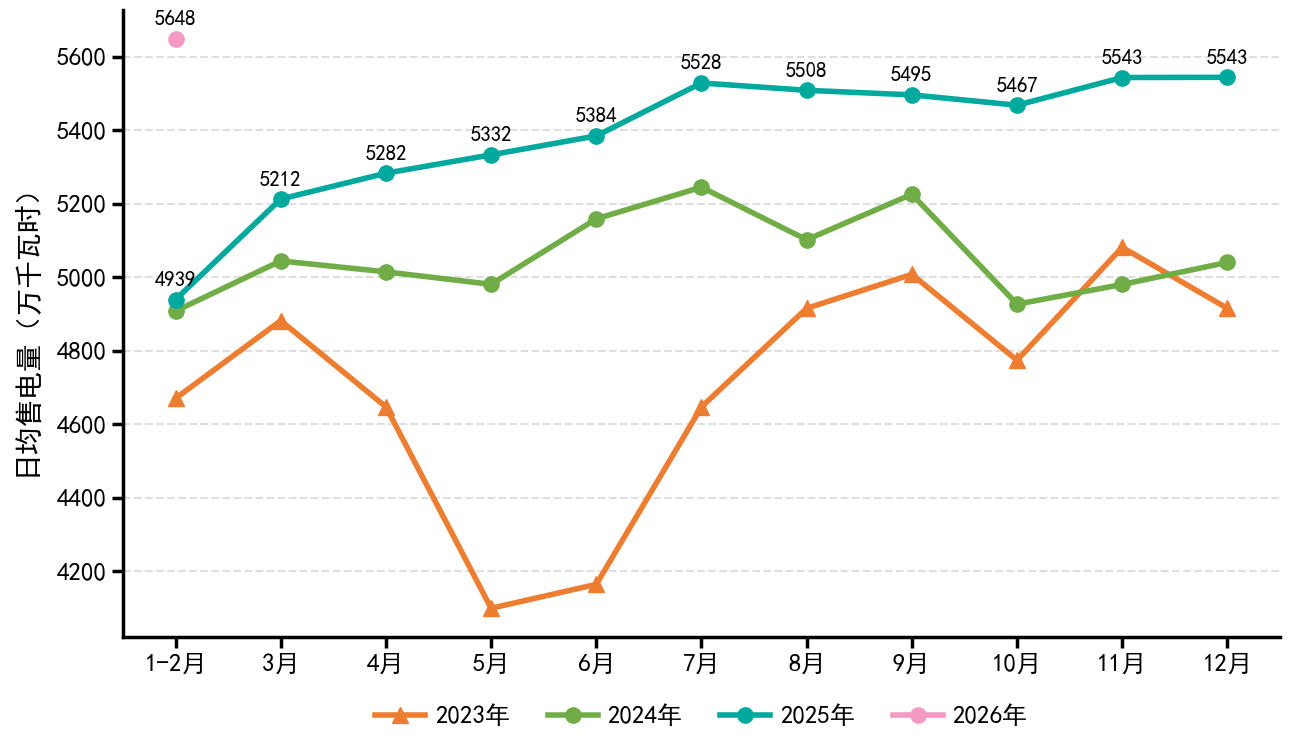

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\化工.png
------------------------------
正在处理: 建材 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 建材


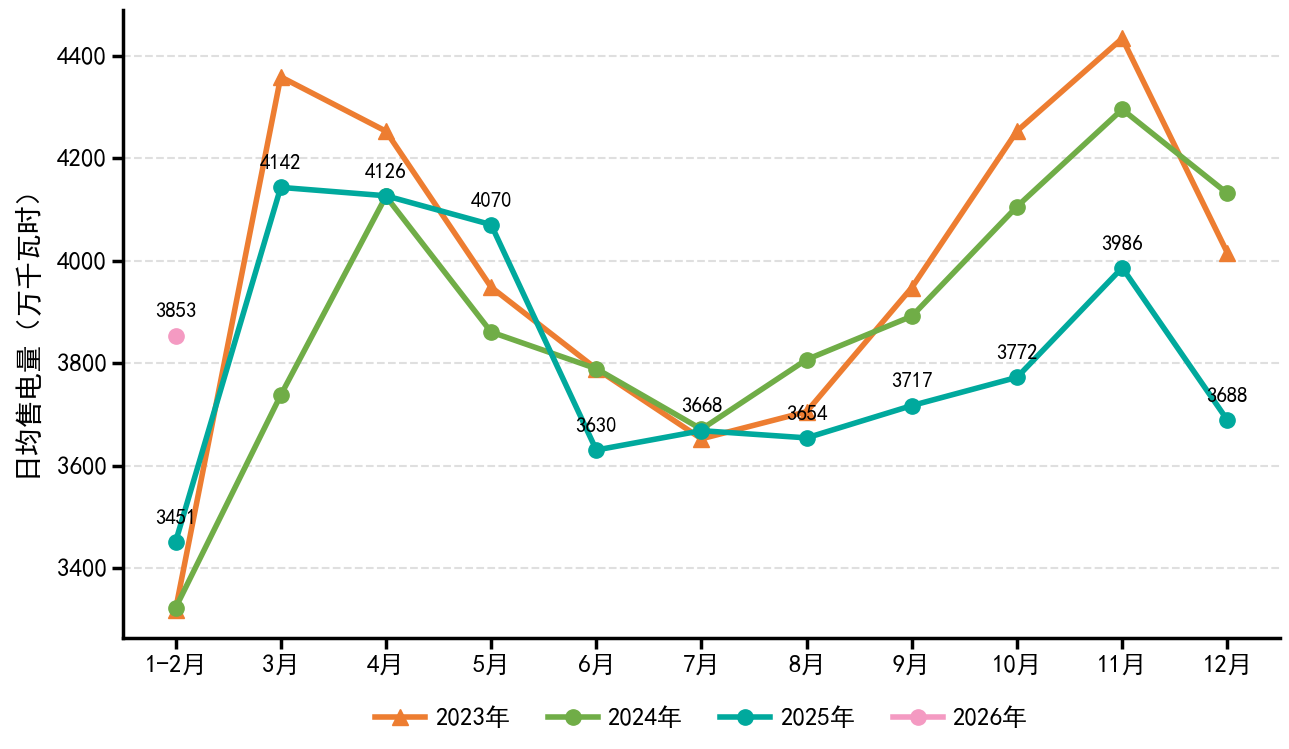

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\建材.png
------------------------------
正在处理: 钢铁 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 钢铁


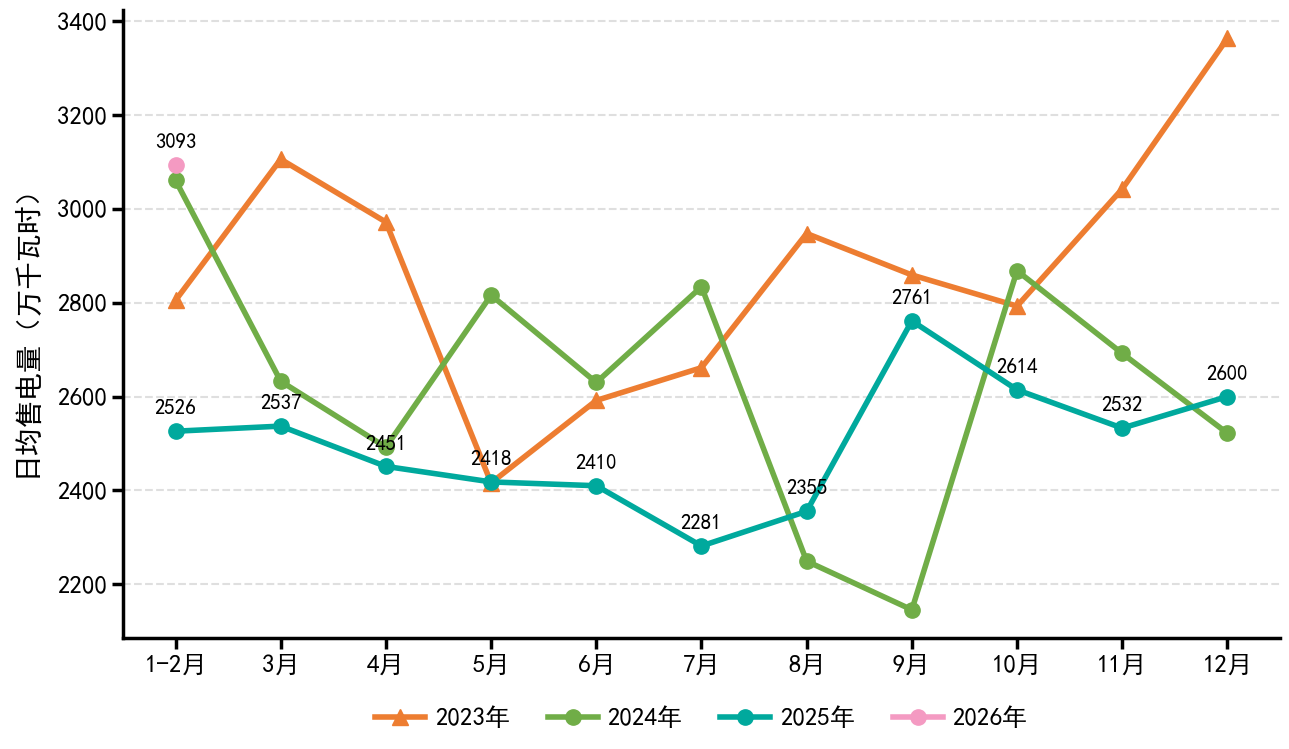

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\钢铁.png
------------------------------
正在处理: 有色 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 有色


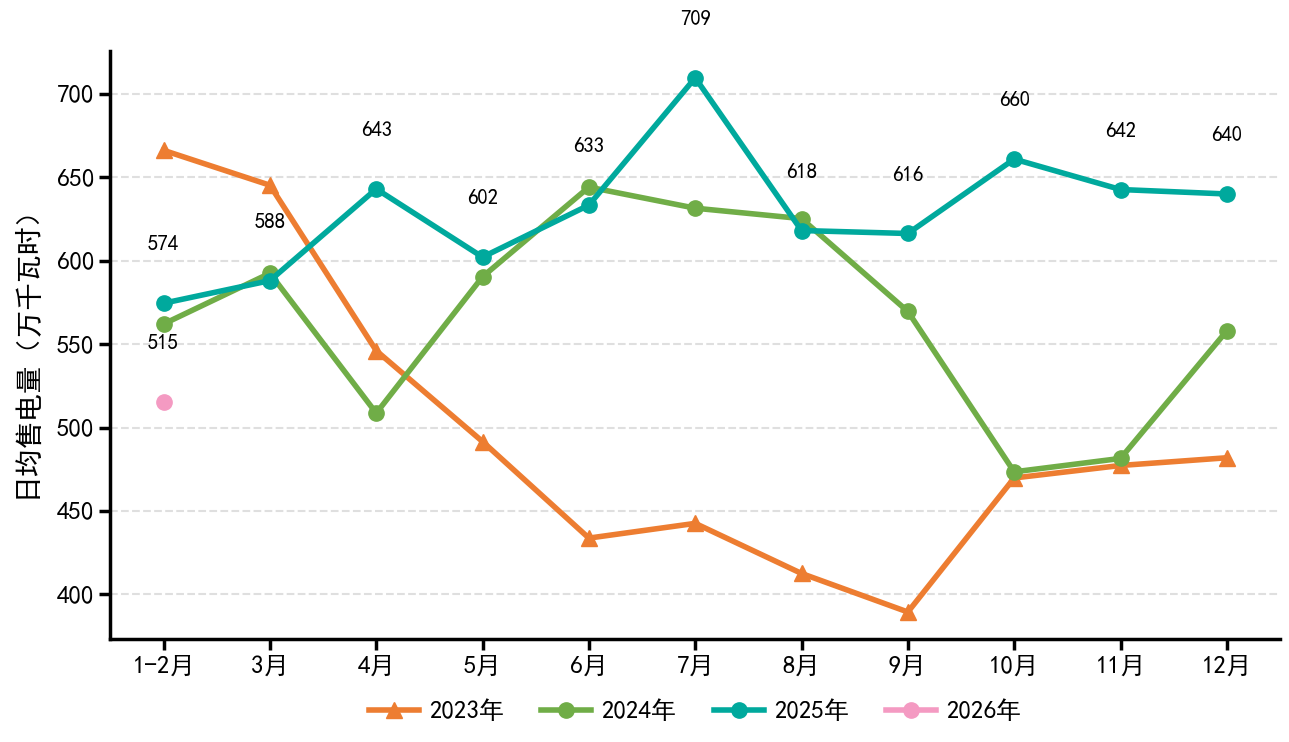

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\有色.png
------------------------------
正在处理: 金属制品 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 金属制品


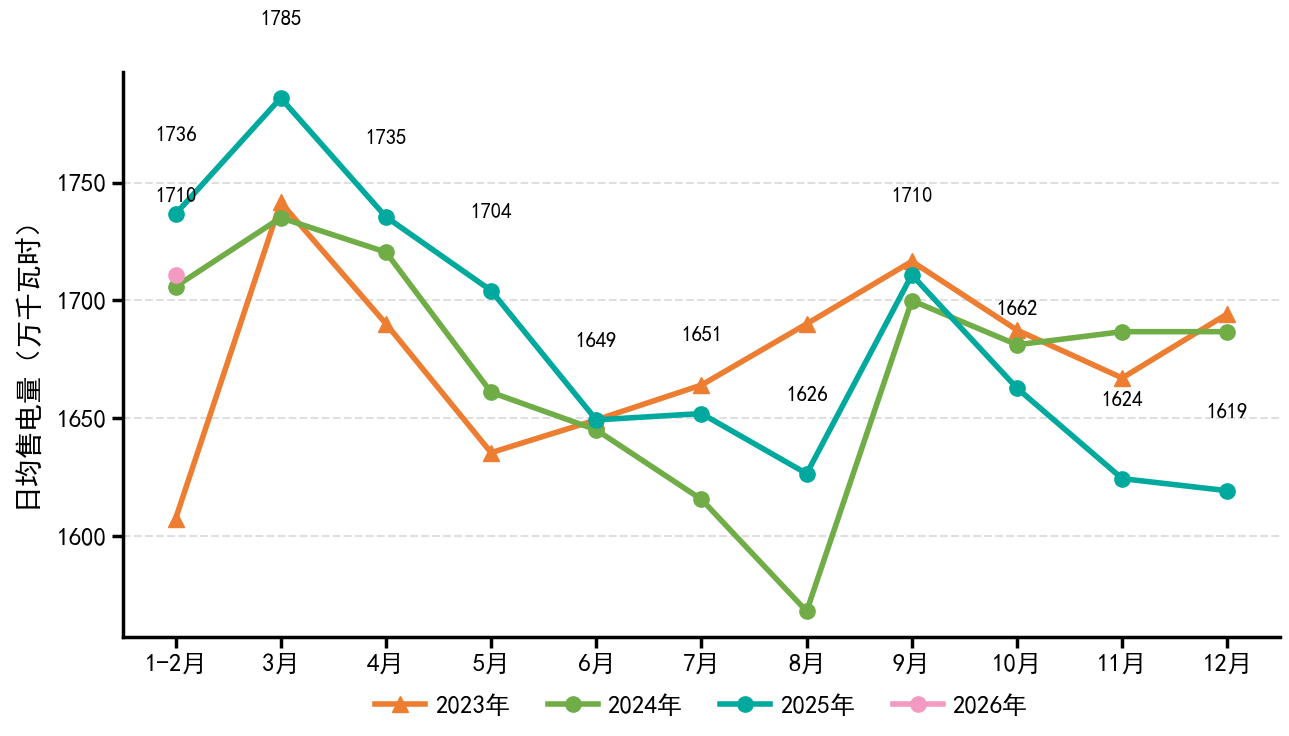

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\金属制品.png
------------------------------
正在处理: 汽车 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 汽车


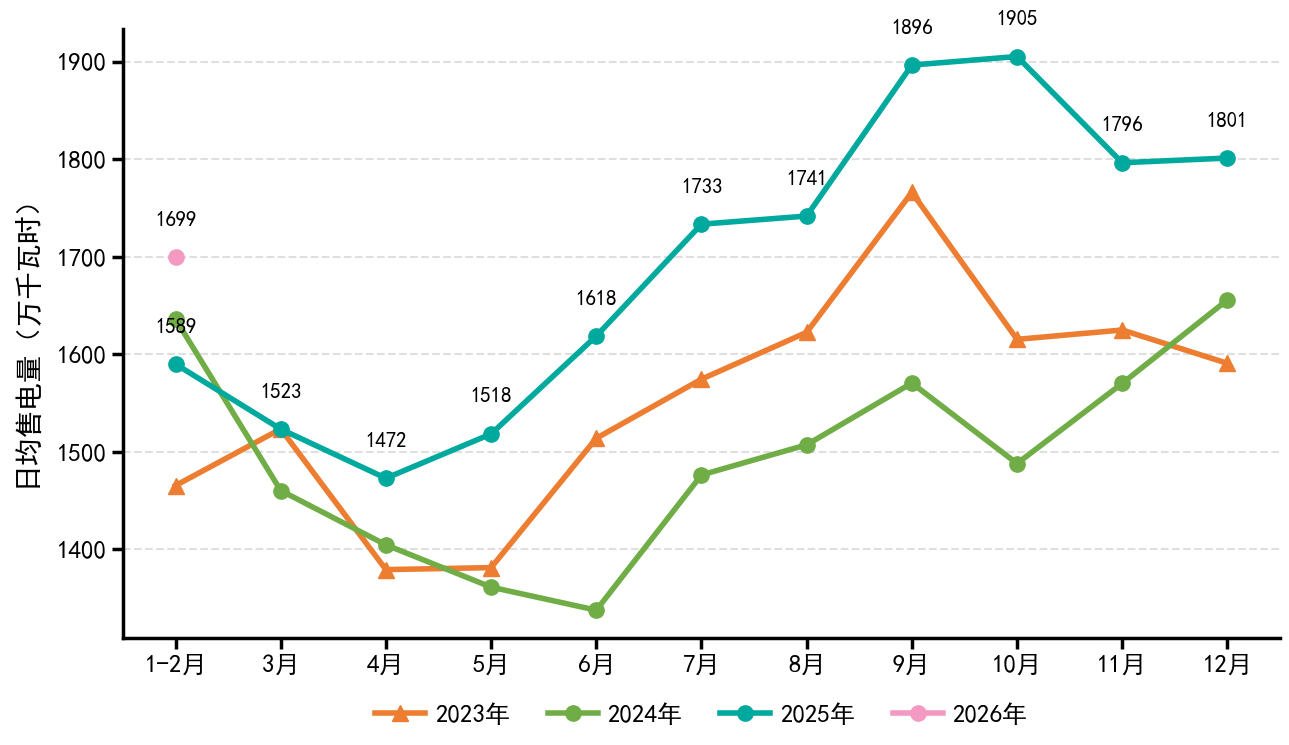

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\汽车.png
------------------------------
正在处理: 电气机械 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 电气机械


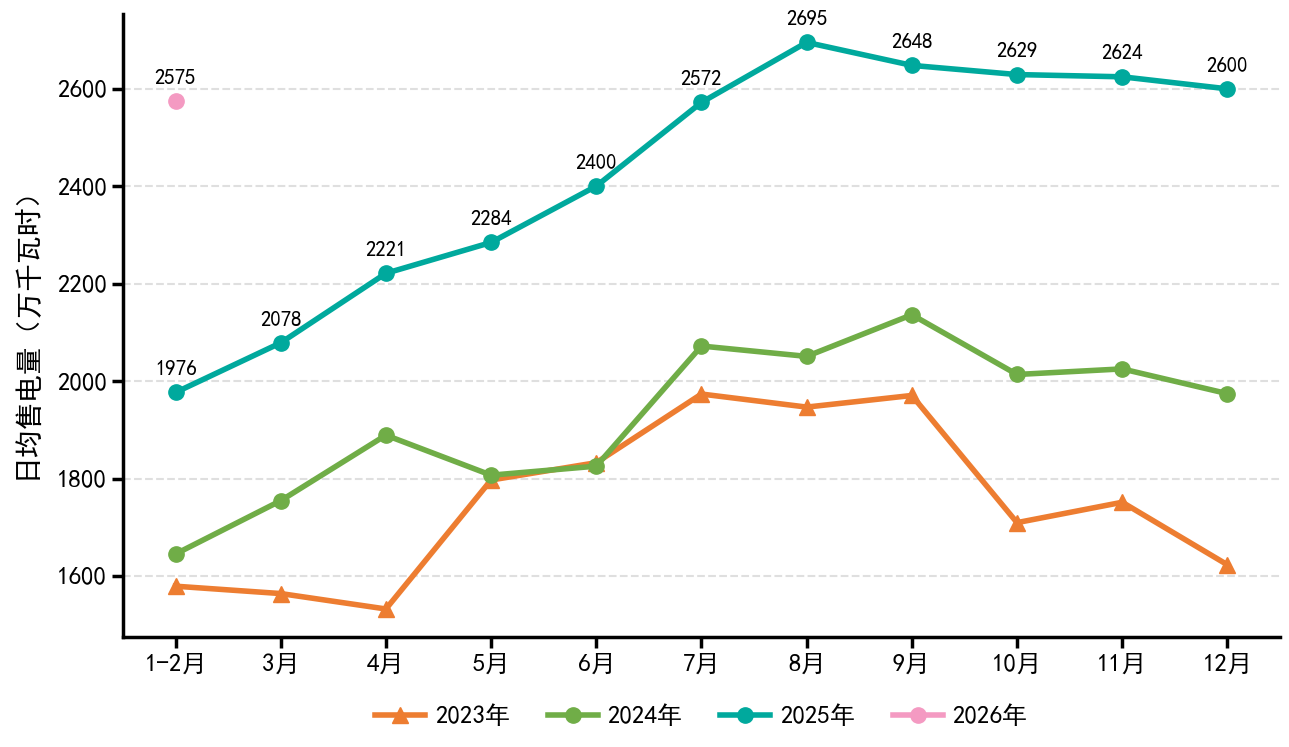

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\电气机械.png
------------------------------
正在处理: 计算机 (包含 1 个行业)
  -> [节假日剔除] 2023-01-01 至 2026-01-19: 剔除 168 天。
表格数据已准备: 计算机


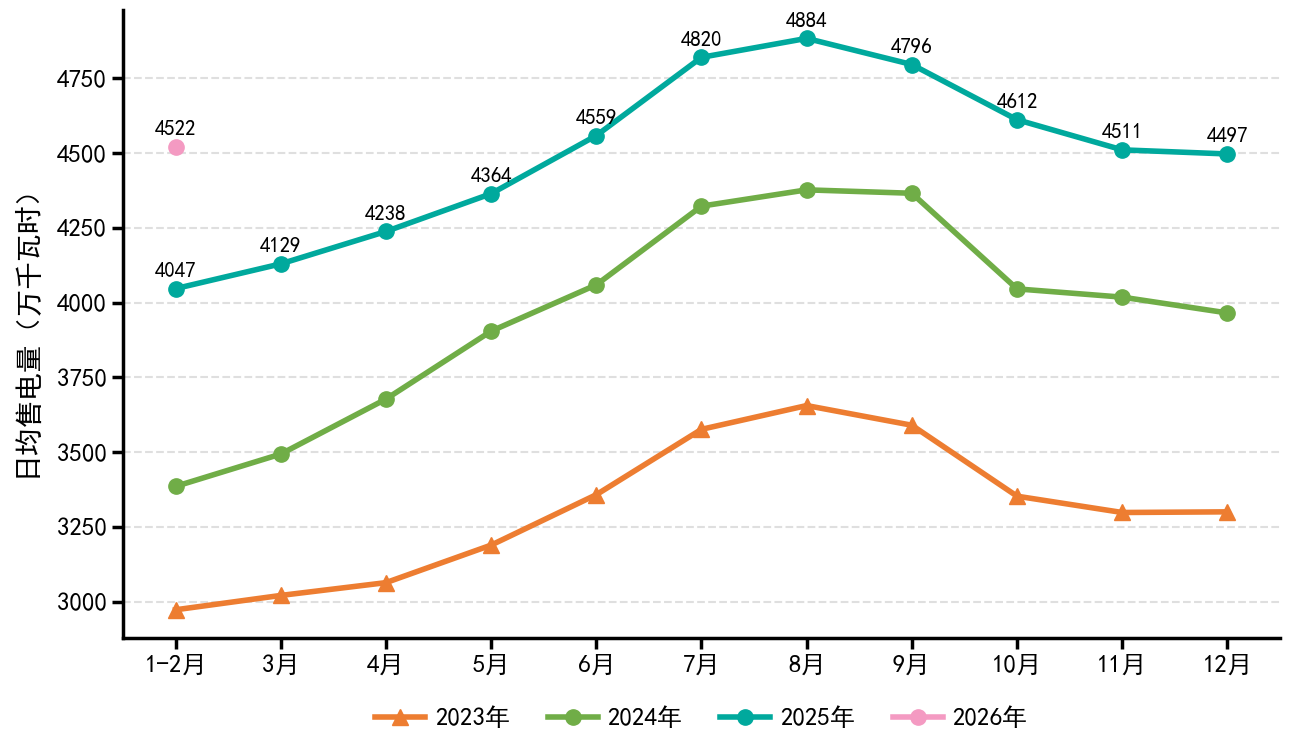

图表已保存: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\计算机.png
------------------------------
已写入 '剔除日期明细' Sheet。

所有分析完成！Excel表格已保存至: E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势\聚合行业日均售电量_剔除节假日.xlsx


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import warnings
from datetime import timedelta, date

# --- 核心库导入 ---
try:
    from chinese_calendar import get_holiday_detail, Holiday
except ImportError:
    raise ImportError("请先安装 chinesecalendar 库：pip install chinesecalendar")

# --- 1. 配置层 ---
class Config:
    # 输入文件路径
    INPUT_FILE = r"E:\A智网\月度电力需求预测报告\0_数据\湖北省行业日用电量_26.1.19.xlsx"
    # 输出文件夹
    OUTPUT_DIR = r"E:\A智网\月度电力需求预测报告\1_分析结果\分行业日均趋势"
    
    # 绘图配置
    FONT_PATH = 'SimHei' 
    YEARS_TO_PLOT = [2022, 2023, 2024, 2025, 2026]
    
    YEAR_COLORS = {
        2022: '#4472C4', 2023: '#ED7D31', 2024: '#70AD47', 
        2025: '#00A99D', 2026: '#F49ac2'
    }

    # 聚合筛选配置
    TARGET_GROUPS = {
        "四大高耗能": [41, 53, 58, 61 ],
        "高技术与装备制造": [46, 65, 67, 69, 71, 73, 77, 79, 82],
        "消费品制造业": [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37],
        "二产": [4],
        "化工" : [41],
        "建材": [53],
        "钢铁": [58],
        "有色": [61],
        "金属制品": [65],
        "汽车": [71],
        "电气机械": [77],
        "计算机": [79], 
    }

    # --- 【新增】春节日期硬编码 (正月初一) ---
    SPRING_FESTIVAL_DATES = {
        2022: '2022-02-01',
        2023: '2023-01-22',
        2024: '2024-02-10',
        2025: '2025-01-29',
        2026: '2026-02-17'
    }

# 确保输出目录存在
os.makedirs(Config.OUTPUT_DIR, exist_ok=True)
plt.rcParams['font.sans-serif'] = [Config.FONT_PATH]
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

# --- 2. 数据处理核心函数 ---

def generate_exclusion_report(df_raw):
    """
    生成剔除日期明细表 (用于核对)
    """
    print("正在生成剔除日期明细报告...")
    
    date_cols = [c for c in df_raw.columns if str(c).isdigit() and len(str(c)) == 8]
    all_dates = pd.to_datetime(date_cols, format='%Y%m%d')
    
    # 1. 准备特殊剔除集合
    pre_spring_dates = set() # 春节前
    post_spring_dates = set() # 春节后
    pre_national_dates = set() # 国庆前
    
    # 处理春节相关
    for year, date_str in Config.SPRING_FESTIVAL_DATES.items():
        spring_start = pd.Timestamp(date_str)
        # 春节前 13 天 (覆盖到前10天及可能的周末调整)
        for i in range(1, 14): 
            pre_spring_dates.add(spring_start - timedelta(days=i))
        # 春节后 15 天 (覆盖法定假期7天 + 节后8天缓冲)
        for i in range(1, 16):
            post_spring_dates.add(spring_start + timedelta(days=i))
            
    # 处理国庆相关 (每年9月28, 29, 30)
    unique_years = all_dates.year.unique()
    for year in unique_years:
        national_day = pd.Timestamp(f"{year}-10-01")
        for i in range(1, 4): # 前3天
            pre_national_dates.add(national_day - timedelta(days=i))

    exclusion_list = []
    
    def to_py_date(date_val):
        if isinstance(date_val, pd.Timestamp): return date_val.date()
        return date_val

    for dt in all_dates:
        reason = []
        py_date = dt.date()
        
        # A. 判断法定节假日
        try:
            is_h, name = get_holiday_detail(py_date)
            if name is not None:
                reason.append(f"法定节假日: {name}")
        except: pass
        
        # B. 判断元旦
        if dt.month == 1 and dt.day == 1:
            reason.append("元旦(强制)")

        # C. 判断春节前
        if dt in pre_spring_dates:
            reason.append("春节前10天+")
            
        # D. 判断春节后
        if dt in post_spring_dates:
            reason.append("春节后8天+")
            
        # E. 判断国庆前
        if dt in pre_national_dates:
            reason.append("国庆前3天")
        
        if reason:
            exclusion_list.append({
                '日期': dt.strftime('%Y-%m-%d'),
                '星期': dt.strftime('%A'),
                '剔除原因': " & ".join(reason)
            })
            
    df_exclusion = pd.DataFrame(exclusion_list)
    week_map = {'Monday': '周一', 'Tuesday': '周二', 'Wednesday': '周三', 
                'Thursday': '周四', 'Friday': '周五', 'Saturday': '周六', 'Sunday': '周日'}
    if not df_exclusion.empty:
        df_exclusion['星期'] = df_exclusion['星期'].map(week_map)
        
    print(f"  -> 共识别出 {len(df_exclusion)} 个需要剔除的日期。")
    return df_exclusion

def filter_statutory_holidays(df):
    """
    剔除法定节假日 + 春节前后 + 国庆前
    """
    if df.empty: return df
    
    def to_py_date(date_val):
        if isinstance(date_val, pd.Timestamp): return date_val.date()
        elif isinstance(date_val, str): return pd.to_datetime(date_val).date()
        return date_val

    # 1. 识别库中的法定节假日
    def is_lib_holiday(date_val):
        try:
            dt = to_py_date(date_val)
            is_holiday, holiday_name = get_holiday_detail(dt)
            return holiday_name is not None
        except: return False

    mask_lib = df['date'].apply(is_lib_holiday)

    # 2. 强制剔除元旦
    mask_new_year = (df['date'].dt.month == 1) & (df['date'].dt.day == 1)

    # 3. 识别特殊剔除日期
    special_dates = set()
    
    # 春节相关
    for year, date_str in Config.SPRING_FESTIVAL_DATES.items():
        spring_start = pd.Timestamp(date_str)
        # 春节前 13 天
        for i in range(1, 14): 
            special_dates.add(spring_start - timedelta(days=i))
        # 春节后 15 天 (覆盖法定假+节后8天)
        for i in range(1, 16):
            special_dates.add(spring_start + timedelta(days=i))
            
    # 国庆相关
    unique_years = df['date'].dt.year.unique()
    for year in unique_years:
        national_day = pd.Timestamp(f"{year}-10-01")
        # 国庆前 3 天
        for i in range(1, 4):
            special_dates.add(national_day - timedelta(days=i))
            
    mask_special = df['date'].isin(special_dates)
    
    # 4. 合并所有掩码
    final_mask = mask_lib | mask_new_year | mask_special
    
    # --- 调试日志 ---
    removed_count = final_mask.sum()
    start_str = df['date'].min().strftime('%Y-%m-%d')
    end_str = df['date'].max().strftime('%Y-%m-%d')
    
    if removed_count > 0:
        removed_dates = sorted(df[final_mask]['date'].unique())
        date_strs = [pd.Timestamp(d).strftime('%m-%d') for d in removed_dates]
        print(f"  -> [节假日剔除] {start_str} 至 {end_str}: 剔除 {len(date_strs)} 天。")
    else:
        print(f"  -> [节假日剔除] {start_str} 至 {end_str}: 未剔除 (0天)。")

    return df[~final_mask].copy()

def process_aggregated_group(df_raw, group_name, id_list):
    """处理聚合行业数据"""
    try:
        df_subset = df_raw[df_raw['序号'].astype(int).isin(id_list)].copy()
    except KeyError:
        print("错误：源数据中找不到'序号'列")
        return None, None

    if df_subset.empty:
        print(f"未找到组 [{group_name}] 对应的任何数据")
        return None, None

    print(f"正在处理: {group_name} (包含 {len(df_subset)} 个行业)")

    date_cols = [c for c in df_subset.columns if str(c).isdigit() and len(str(c)) == 8]
    df_long = df_subset.melt(id_vars=['序号', '行业名称'], value_vars=date_cols, var_name='date_str', value_name='load')
    
    df_daily_sum = df_long.groupby('date_str')['load'].sum().reset_index()
    df_daily_sum['date'] = pd.to_datetime(df_daily_sum['date_str'], format='%Y%m%d')
    
    # --- 剔除节假日 ---
    df_daily_sum = filter_statutory_holidays(df_daily_sum)
    
    if df_daily_sum.empty:
        print("警告：剔除节假日后无剩余数据！")
        return None, None

    df_daily_sum['year'] = df_daily_sum['date'].dt.year
    df_daily_sum['month'] = df_daily_sum['date'].dt.month
    
    def get_period(m): return "1-2月" if m <= 2 else f"{m}月"
    df_daily_sum['period'] = df_daily_sum['month'].apply(get_period)
    
    def get_period_order(m): return 1 if m <= 2 else m
    df_daily_sum['period_order'] = df_daily_sum['month'].apply(get_period_order)

    df_agg = df_daily_sum.groupby(['year', 'period', 'period_order'])['load'].agg(['sum', 'count']).reset_index()
    df_agg['daily_avg'] = df_agg['sum'] / df_agg['count']
    
    df_agg = df_agg[df_agg['year'].isin(Config.YEARS_TO_PLOT)]
    
    if df_agg.empty:
        return None, None

    df_pivot = df_agg.pivot(index='year', columns='period', values='daily_avg')
    
    cols = ['1-2月'] + [f"{i}月" for i in range(3, 13)]
    cols = [c for c in cols if c in df_pivot.columns]
    df_pivot = df_pivot[cols]
    
    return df_pivot, df_agg

# --- 3. 绘图函数 ---

def plot_daily_avg_chart(df_pivot, display_name):
    """绘制针对 Word 四宫格缩放优化的图表"""
    fig, ax = plt.subplots(figsize=(13, 7.5))
    
    x_labels = df_pivot.columns.tolist()
    x_indices = range(len(x_labels))
    
    for year in df_pivot.index:
        row_data = df_pivot.loc[year]
        valid_data = row_data.dropna()
        
        if valid_data.empty: continue
            
        valid_x_indices = [x_labels.index(col) for col in valid_data.index]
        color = Config.YEAR_COLORS.get(year, 'gray')
        
        ax.plot(valid_x_indices, valid_data.values, 
                marker='^' if year == 2023 else 'o', 
                markersize=11,
                linewidth=4.0,
                label=f"{year}年",
                color=color)
        
        if year == 2026 or year == 2025: 
             for x, y in zip(valid_x_indices, valid_data.values):
                offset = 30 if year == 2026 else 30
                va = 'bottom'
                ax.text(x, y + offset, f"{int(y)}", 
                        ha='center', va=va, 
                        fontsize=15,
                        fontweight='bold',
                        color='black')

    ax.set_xticks(x_indices)
    ax.set_xticklabels(x_labels, fontsize=18, fontweight='bold')
    
    ax.tick_params(axis='y', labelsize=18) 
    ax.set_ylabel("日均售电量（万千瓦时）", fontsize=20, labelpad=15, fontweight='bold')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    
    ax.tick_params(width=2.5, length=8)

    ax.grid(True, axis='y', linestyle='--', alpha=0.4, linewidth=1.5)
    ax.grid(False, axis='x')
    
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.18), 
              ncol=5, frameon=False, 
              fontsize=18,
              handletextpad=0.4, columnspacing=1.5)
    
    plt.tight_layout()
    
    save_path = os.path.join(Config.OUTPUT_DIR, f"{display_name}.png")
    plt.savefig(save_path, dpi=600)
    plt.show()
    print(f"图表已保存: {save_path}")


# --- 4. 主程序 ---

def main():
    print("开始聚合分析 (剔除节假日+春节前后+国庆前)...")
    
    try:
        df_raw = pd.read_excel(Config.INPUT_FILE)
        df_raw.columns = df_raw.columns.map(str)
    except Exception as e:
        print(f"读取文件失败: {e}")
        return

    excel_save_path = os.path.join(Config.OUTPUT_DIR, "聚合行业日均售电量_剔除节假日.xlsx")
    
    # 1. 生成剔除日期明细
    df_exclusion = generate_exclusion_report(df_raw)

    successful_sheets = []

    # 2. 处理各行业数据
    for group_name, id_list in Config.TARGET_GROUPS.items():
        df_pivot, _ = process_aggregated_group(df_raw, group_name, id_list)
        
        if df_pivot is not None:
            sheet_name = group_name[:31].replace('/', '_')
            df_output = df_pivot.round(0).astype('Int64', errors='ignore')
            
            successful_sheets.append((sheet_name, df_output))
            
            print(f"表格数据已准备: {group_name}")
            plot_daily_avg_chart(df_pivot, group_name)
            print("-" * 30)
    
    # 3. 保存 Excel
    if successful_sheets:
        with pd.ExcelWriter(excel_save_path) as writer:
            # 写入行业数据
            for sheet_name, df_output in successful_sheets:
                df_output.to_excel(writer, sheet_name=sheet_name)
            
            # 写入剔除明细 (放在最后一个 Sheet)
            if not df_exclusion.empty:
                df_exclusion.to_excel(writer, sheet_name="剔除日期明细", index=False)
                print("已写入 '剔除日期明细' Sheet。")
                
        print(f"\n所有分析完成！Excel表格已保存至: {excel_save_path}")
    else:
        print("\n没有生成任何有效数据，未保存Excel文件。")

if __name__ == "__main__":
    main()